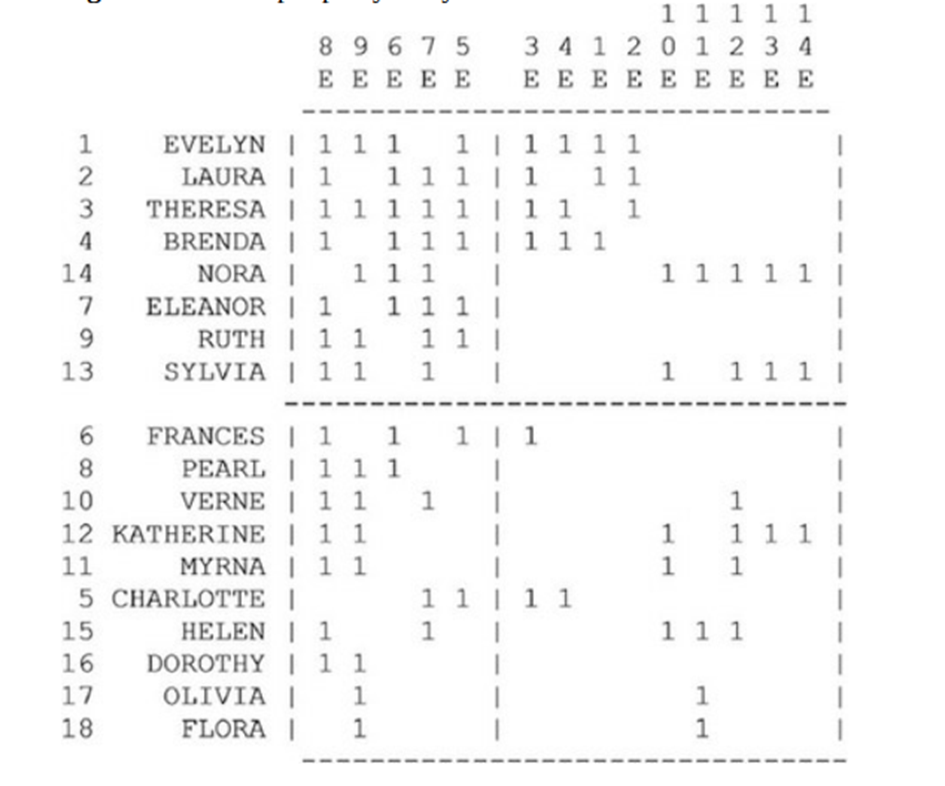

In [4]:
#Installer la bibliothèque de Louvain
pip install python-louvain

Équivalences structurelles (communautés):
Communauté Woman0: 0
Communauté Woman1: 0
Communauté Woman2: 0
Communauté Woman3: 0
Communauté Woman4: 1
Communauté Woman5: 2
Communauté Woman6: 2
Communauté Woman7: 1
Communauté Woman8: 0
Communauté Woman9: 2
Communauté Woman10: 1
Communauté Woman11: 1
Communauté Woman12: 1
Communauté Woman13: 0
Communauté Woman14: 1
Communauté Woman15: 2
Communauté Woman16: 1
Communauté Woman17: 1
Communauté Event0: 2
Communauté Event1: 1
Communauté Event2: 0
Communauté Event3: 2
Communauté Event4: 0
Communauté Event5: 0
Communauté Event6: 0
Communauté Event7: 0
Communauté Event8: 0
Communauté Event9: 1
Communauté Event10: 1
Communauté Event11: 1
Communauté Event12: 1
Communauté Event13: 1


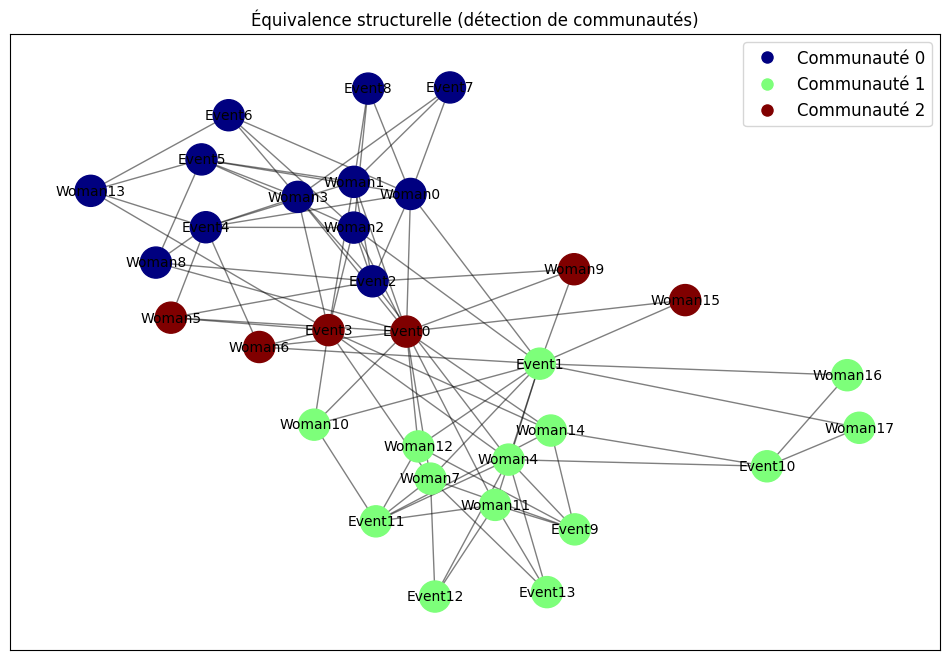

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

# Jeu de données sur les femmes du Sud (nœuds: femmes et événements)
adj_matrix = np.array([
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
])

# Création du graphe bipartite
B = nx.Graph()

# Ajout des nœuds pour les femmes et les événements
women = ["Woman" + str(i) for i in range(18)]
events = ["Event" + str(i) for i in range(14)]

B.add_nodes_from(women, bipartite=0)
B.add_nodes_from(events, bipartite=1)

# Ajout des arêtes selon la matrice d'adjacence
edges = [(women[i], events[j]) for i in range(len(women)) for j in range(len(events)) if adj_matrix[i, j] == 1]
B.add_edges_from(edges)

# Calcul des équivalences structurelles en utilisant l'algorithme de Louvain pour identifier les communautés
partition = community_louvain.best_partition(B)

# Affichage des communautés
print("Équivalences structurelles (communautés):")
for community, nodes in partition.items():
    print(f"Communauté {community}: {nodes}")

# Visualisation des communautés
pos = nx.spring_layout(B, seed=42)  # Ajout d'une graine pour une disposition cohérente
plt.figure(figsize=(12, 8))

# Dessin des nœuds
node_colors = [partition[node] for node in B.nodes()]
nx.draw_networkx_nodes(B, pos, node_size=500, node_color=node_colors, cmap=plt.cm.jet)

# Dessin des étiquettes
labels = {node: node for node in B.nodes()}
nx.draw_networkx_labels(B, pos, labels, font_size=10)

# Dessin des arêtes
nx.draw_networkx_edges(B, pos, alpha=0.5)

# Ajout d'une légende
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.jet(i / max(partition.values())), markersize=10) for i in range(max(partition.values()) + 1)]
labels = [f'Communauté {i}' for i in range(max(partition.values()) + 1)]
plt.legend(handles, labels, loc='upper right', fontsize='large')

plt.title("Équivalence structurelle (détection de communautés)")
plt.show()
